<a href="https://colab.research.google.com/github/IntroductionToAICW/CW/blob/main/preprocessing/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plots that important for the analysis: 

---

1) a review distribution for each label


---


2) unigram for each label(the frequency of the words for each one of our label)

---


3) biagram for each label(the frequency of the a sequence of 2 words for each one of our label)

# Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import random
from sklearn.feature_extraction.text import CountVectorizer 
from google.colab import drive

# Import Dataset

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_pickle("/content/drive/My Drive/dataset/valid_df.pkl")

In [ ]:
df["afterProcessReview"] = df["NoSW_Lemma_NoSal_ASCII_NoHTML_text"]

df.head(2)

,text,labels,lang,NoHTML_text,ASCII_NoHTML_text,Lemma_NoSal_ASCII_NoHTML_text,NoSW_Lemma_NoSal_ASCII_NoHTML_text,afterProcess,afterProcessReview
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1,en,#FollowFriday @France_Inte @PKuchly57 @Milipol...,for being top engaged members in my community ...,for be top engage member in my community this ...,engage member community week,engage member community week,engage member community week
1,@Lamb2ja Hey James! How odd :/ Please call our...,1,en,@Lamb2ja Hey James! How odd :/ Please call our...,hey james how odd please call our contact cent...,hey james how odd please call our contact cent...,hey james odd contact centre able assist thanks,hey james odd contact centre able assist thanks,hey james odd contact centre able assist thanks


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9833 entries, 0 to 9832
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   text                                9833 non-null   object
 1   labels                              9833 non-null   int64 
 2   lang                                9833 non-null   object
 3   NoHTML_text                         9833 non-null   object
 4   ASCII_NoHTML_text                   9833 non-null   object
 5   Lemma_NoSal_ASCII_NoHTML_text       9833 non-null   object
 6   NoSW_Lemma_NoSal_ASCII_NoHTML_text  9833 non-null   object
 7   afterProcess                        9833 non-null   object
 8   afterProcessReview                  9833 non-null   object
dtypes: int64(1), object(8)
memory usage: 691.5+ KB


#Create dataframes for positive and negative tweets


In [ ]:
listPos = list(df["afterProcessReview"].loc[df['labels'] == 1])

In [ ]:
listNeg = list(df["afterProcessReview"].loc[df['labels'] == 0])

In [ ]:
# print positive in greeen
print('\033[92m' + listPos[random.randint(0,len(listPos))])

# print negative in red
print('\033[91m' + listNeg[random.randint(0,len(listNeg))])


thanks follow
meet steven kid listens


# Review distribution for each label

The labels are 1 for positive tweets and 0 for negative tweets


In [ ]:
print(len(df.loc[df['labels'] == 0]))

4833


In [ ]:
print(len(df.loc[df['labels'] == 1]))

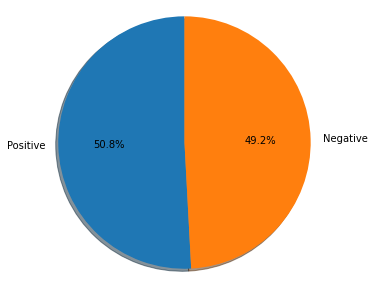

In [ ]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positive', 'Negative'

# Sizes for each side
sizes = [len(df.loc[df['labels'] == 1]), len(df.loc[df['labels'] == 0])] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

1) Word count: counts the number of tokens in the text (separated by a space)


---


2) Character count: sum the number of characters of each token

---

3) Average word length: sum of words length divided by the number of words (character count/word count)


# Word count: counts the number of tokens in the text (separated by a space)


In [ ]:
dfStats = pd.DataFrame(df["afterProcessReview"])
dfStats["wordCount"] = df["afterProcessReview"].str.split().str.len()

# Character count: count the number of characters of all the tokens in a review (with and without spaces)


In [ ]:
dfStats["characterCount"] = dfStats["afterProcessReview"].str.len()
dfStats["characterCountNoSpc"] = dfStats["afterProcessReview"].str.len()-dfStats["afterProcessReview"].str.count(" ")

# Average Word Length


In [ ]:
dfStats["averageWordLength"] = dfStats["characterCountNoSpc"]/dfStats["wordCount"]

dfStats

,afterProcessReview,wordCount,characterCount,characterCountNoSpc,averageWordLength
0,engage member community week,4,28,25,6.250000
1,hey james odd contact centre able assist thanks,8,47,40,5.000000
2,listen night bleed amaze track scotland,6,39,34,5.666667
3,congrats,1,8,8,8.000000
4,yeaaaah yippppy accnt verify rqst succeed blue...,12,71,60,5.000000
...,...,...,...,...,...
9828,want change avi usanele,4,23,20,5.000000
9829,puppy broke foot,3,16,14,4.666667
9830,jaebum baby picture,3,19,17,5.666667
9831,mr ahmad maslan cook,4,20,17,4.250000


# Density plot for the dfStats daframe


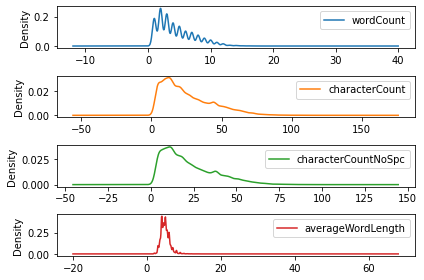

In [ ]:
dfStats.plot(kind='density', subplots= True, sharex = False, bw_method=0.1)
plt.tight_layout()
plt.show()

# Word frequency

In [ ]:
from collections import defaultdict

#'False': display all columns next to each other at the console
pd.set_option('display.expand_frame_repr', 200)
#display all rows and columns in the console without hiding with ...
#change the None to actual numbers in order to define the displayed output
pd.set_option("display.max_rows", None, "display.max_columns", 200)

wordFreq = defaultdict(int)

for review in df["afterProcessReview"].values.tolist():
    for word in review.split():
        wordFreq[word] += 1

dfNegFreq = pd.DataFrame.from_dict(wordFreq, orient='index').sort_values(0, ascending=False).rename(columns={0: 'frequency'})
print(dfNegFreq.head(20))


        frequency
not          1511
follow        626
love          478
thanks        472
want          468
no            455
like          452
day           398
good          334
miss          331
know          289
time          285
thank         279
work          246
look          239
today         227
happy         216
hi            207
new           198
hope          197


# Document Term Matrix

Create a document term matrix for postive tweets and negative tweets

In [ ]:
dfPosNeg=df[['labels','afterProcessReview']].groupby(by='labels').agg(lambda x:' '.join(x))
dfPosNeg.head()

,afterProcessReview
labels,
0,baby look tire gift calibraska massive shame a...
1,engage member community week hey james odd con...


In [ ]:
cv=CountVectorizer(analyzer='word')
vec=cv.fit_transform(dfPosNeg['afterProcessReview'])
dfDtm = pd.DataFrame(vec.toarray(), columns=cv.get_feature_names())
dfDtm.index=dfPosNeg.index
dfDtm.head(3)

,aa,aaaaaaaaaaa,aaaaaaaaaaaaa,aaaaaaaaaaaah,aaaaaand,aaaaages,aaaaahhhhhhhh,aaaahh,aaaahhh,aaahhh,aah,aahhhh,aaj,aameen,aamir,aapke,aaron,aarww,aasra,aayegi,ab,abandon,abby,abbymill,abes,abhi,abi,abit,able,abligaverins,aboard,abouty,abp,abroad,abrupt,abscess,absent,absolute,absolutely,abstinence,abt,abu,abudhabi,abusive,abuti,ac,academic,acads,acc,accent,accept,accepted,access,accessory,accident,accidentally,accnt,accommodate,accomplishment,accord,account,accumulate,accurate,acdc,ace,acha,ache,achebe,achi,achieve,acid,ack,acne,acorn,acoustic,act,action,activation,active,activity,actor,actress,actual,actually,acube,ad,ada,adam,add,addict,addiction,addictive,addition,address,adf,adidas,adios,adis,aditya,admin,...,yg,yhoooooo,yi,yield,yiling,yipeeee,yippee,yippeee,yippppy,yk,ykr,ylona,yna,yo,yodel,yoga,yoghurt,yogurt,yok,yolo,yongbe,yoohoo,yoona,yoot,york,yorkshire,yosh,yots,young,youngjae,yous,youth,youtu,youtube,youtuber,youu,youuu,youuuu,youuuuuu,youuuuuuu,yr,ystrday,yt,ytb,ytd,yu,yuck,yujin,yuki,yulin,yum,yummmm,yummmyyy,yummy,yumu,yun,yuna,yung,yunnie,yup,yuppiieee,yvette,yvw,zac,zach,zack,zaine,zamn,zante,zap,zara,zareen,zayn,zayns,zayyyyyn,zaz,zdps,zealand,zehr,zelda,zen,zenmate,zero,ziam,zikra,zipper,zodiac,zoe,zokay,zone,zonzofox,zoo,zoom,zopiclone,zumba,zy,zz,zzz,zzzz,zzzzzz
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,1,1,0,0,5,1,3,2,0,0,1,0,23,2,0,1,0,2,0,1,0,2,4,0,3,0,1,1,0,1,1,1,8,1,1,1,2,0,2,1,0,0,0,0,20,0,2,1,0,0,2,0,0,1,0,0,2,0,2,4,2,1,2,2,0,0,2,22,1,1,0,2,27,1,0,0,1,3,0,1,1,0,1,0,...,1,0,0,1,1,0,0,0,0,1,0,1,1,4,2,2,0,0,0,1,1,0,0,0,1,0,0,1,7,1,0,0,1,4,1,2,1,3,1,0,4,1,3,0,1,1,1,0,1,1,1,0,0,2,1,1,0,2,1,4,0,0,0,0,1,0,0,1,0,1,1,0,7,1,1,1,0,0,1,0,0,1,1,1,1,1,0,0,1,2,0,2,2,1,1,0,1,1,1,1
1,3,0,0,0,1,0,0,0,1,1,0,0,0,2,1,1,0,0,1,1,1,1,1,0,1,2,0,1,8,0,3,0,2,2,1,0,1,2,7,1,2,2,0,0,1,1,1,0,2,0,0,1,3,1,0,0,2,1,1,1,19,1,1,0,1,2,0,1,2,2,1,1,0,1,0,8,1,0,6,0,1,3,1,18,0,3,1,1,33,1,1,2,0,10,1,0,0,1,0,2,...,0,1,1,0,0,1,1,1,1,0,1,0,0,7,0,1,1,2,1,0,0,1,1,1,2,2,1,0,7,0,1,19,0,10,1,0,1,0,0,1,3,0,2,1,0,1,0,1,1,0,2,1,1,3,0,1,2,1,0,6,1,1,1,1,1,1,1,0,1,0,0,1,3,0,0,0,1,1,0,1,1,0,0,0,0,0,1,2,0,0,3,0,0,0,0,1,0,1,0,0


# Wordcloud for positive and negative tweets
Visualizes the most popular words in each of the categories


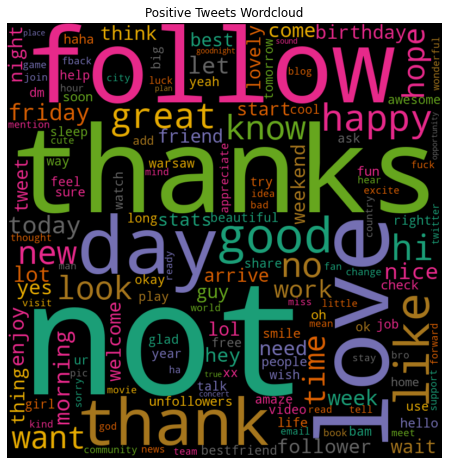

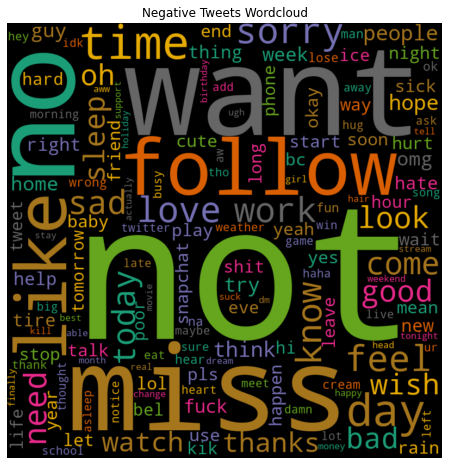

In [ ]:
from wordcloud import WordCloud
from textwrap import wrap

dfDtm = dfDtm.transpose()

posWordCloud = WordCloud(width = 800, height = 800, max_words = 150, colormap = "Dark2").generate_from_frequencies(dfDtm.iloc[:,1])
plt.figure(figsize=(10,8))
plt.imshow(posWordCloud, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Tweets Wordcloud')
plt.show()

negWordCloud = WordCloud(width = 800, height = 800, max_words = 150, colormap = "Dark2").generate_from_frequencies(dfDtm.iloc[:,0])
plt.figure(figsize=(10,8))
plt.imshow(negWordCloud, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Tweets Wordcloud')
plt.show()

# N-grams

### Unigrams


In [ ]:
from nltk.tokenize import word_tokenize
from nltk import ngrams
nltk.download('punkt')
from collections import Counter
import seaborn as sb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


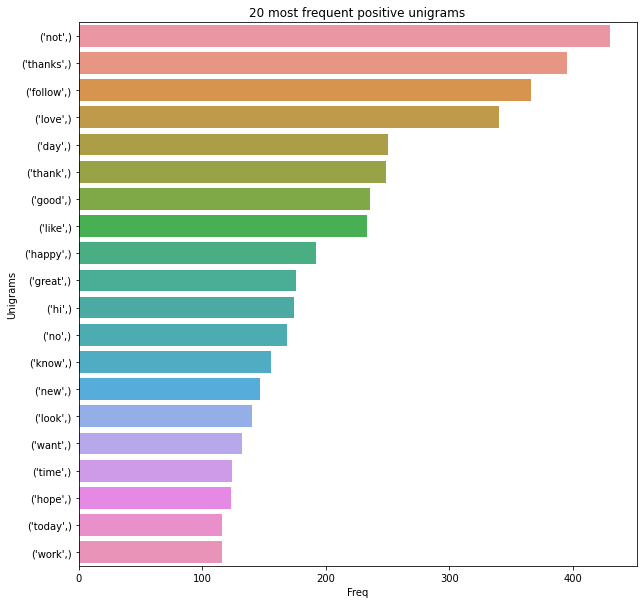

In [ ]:
# join all the positive tweets, tokenize the tweets (split into tokens), generate all posible unigrams from the data, count the frequency of the unigrams
pos_data = " ".join(df.loc[df.labels == 1, 'afterProcessReview'])
pos_data_tokens = word_tokenize(pos_data)
pos_unigrams = ngrams(pos_data_tokens, 1)
pos_unigrams_freq = Counter(pos_unigrams)

# create a dataframe with the 20 most common positive unigrams
dfPos = pd.DataFrame(pos_unigrams_freq.most_common(20))


# plot the 20 most common unigrams
plt.rcParams['figure.figsize'] = [10,10]
#sb.set(font_scale = 1.5)

pos_plot = sb.barplot(x = dfPos[1], y = dfPos[0])
pos_plot.set(xlabel = 'Freq', ylabel = 'Unigrams', title = '20 most frequent positive unigrams');

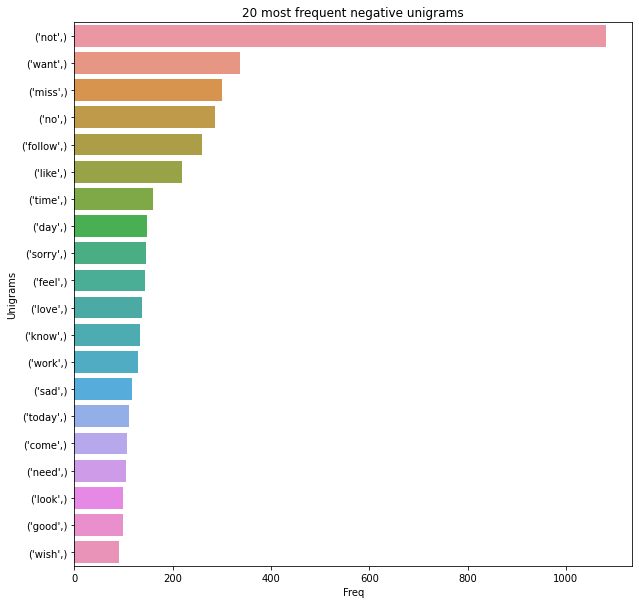

In [ ]:
# join all the negative tweets, tokenize the tweets (split into tokens), generate all posible unigrams from the data, count the frequency of the unigrams
neg_data = " ".join(df.loc[df.labels == 0, 'afterProcessReview'])
neg_data_tokens = word_tokenize(neg_data)
neg_unigrams = ngrams(neg_data_tokens, 1)
neg_unigrams_freq = Counter(neg_unigrams)

# create a dataframe with the 20 most common positive unigrams
dfNeg = pd.DataFrame(neg_unigrams_freq.most_common(20))


# plot the 20 most common unigrams
plt.rcParams['figure.figsize'] = [10,10]

neg_plot = sb.barplot(x = dfNeg[1], y = dfNeg[0])
neg_plot.set(xlabel = 'Freq', ylabel = 'Unigrams', title = '20 most frequent negative unigrams');

### Bigrams

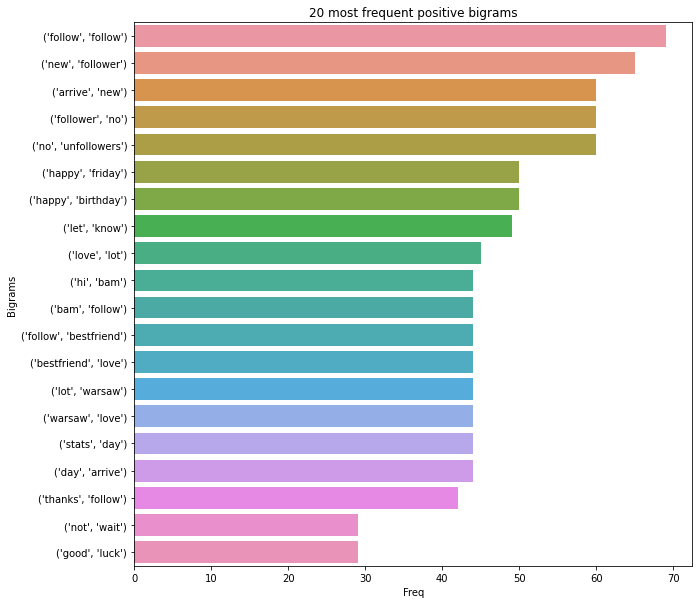

In [ ]:
# generate bigrams for the positive tweet tokens, count frequency of bigrams
pos_bigrams = ngrams(pos_data_tokens, 2)
pos_bigrams_freq = Counter(pos_bigrams)

# store 20 most frequent bigrams in a dataframe
dfPos = pd.DataFrame(pos_bigrams_freq.most_common(20))

# plot the 20 most common bigrams
plt.rcParams['figure.figsize'] = [10,10]

pos_plot = sb.barplot(x = dfPos[1], y = dfPos[0])
pos_plot.set(xlabel = 'Freq', ylabel = 'Bigrams', title = '20 most frequent positive bigrams');


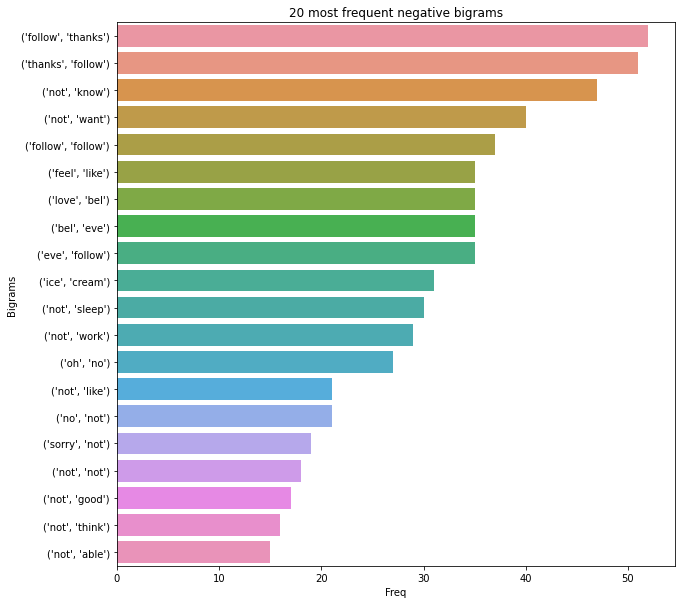

In [ ]:
# generate bigrams for the negative tweet tokens, count frequency of bigrams
neg_bigrams = ngrams(neg_data_tokens, 2)
neg_bigrams_freq = Counter(neg_bigrams)

# store 20 most frequent bigrams in a dataframe
dfNeg = pd.DataFrame(neg_bigrams_freq.most_common(20))

# plot the 20 most common bigrams
plt.rcParams['figure.figsize'] = [10,10]

neg_plot = sb.barplot(x = dfNeg[1], y = dfNeg[0])
neg_plot.set(xlabel = 'Freq', ylabel = 'Bigrams', title = '20 most frequent negative bigrams');